In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('x:/LAB/MachineLearning/KenLee/pred_ds_salary_proj/apps/data/training_data_cleaned/cleaned_training_data.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,state,age_of_company,python_skill,sql_skill,r_studio_skill,spark_skill,excel_skill,aws_skill,azure_skill,gcp_skill
0,0,Data Scientist,$100K - $160K (Glassdoor est.),Are you passionate about providing real impact...,4.7,Johns Hopkins Applied Physics Laboratory (APL)...,"Laurel, MD",-1,5001 to 10000 Employees,1942,...,MD,79,1,0,0,0,1,0,0,0
1,1,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",-1,10000+ Employees,1936,...,MD,85,1,0,0,0,1,0,0,0
2,2,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",-1,-1,-1,...,MD,-1,1,0,0,0,1,0,0,0
3,3,Operations Data Analyst,$36K - $62K (Glassdoor est.),Make your mark. With more than $17.2 billion o...,4.0,Plante Moran\n4.0,"Kalamazoo, MI",-1,1001 to 5000 Employees,1924,...,MI,97,0,0,0,0,1,0,0,0
4,6,HCM Data Analyst,$55K - $94K (Glassdoor est.),Any qualified individual with a disability who...,3.1,Austal USA\n3.1,"Mobile, AL",-1,1001 to 5000 Employees,1988,...,AL,33,0,0,0,0,1,0,0,0


In [8]:
df.shape

(664, 30)

In [10]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'state', 'age_of_company', 'python_skill', 'sql_skill',
       'r_studio_skill', 'spark_skill', 'excel_skill', 'aws_skill',
       'azure_skill', 'gcp_skill'],
      dtype='object')

In [14]:
def simplify_title(title):
    if 'scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'architect' in title.lower():
        return 'architect'
    elif 'consultant' in title.lower():
        return 'consultant'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif' director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def simplify_seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'jr' in title.lower():
        return 'jr'
    elif 'intern' in title.lower():
        return 'int'
    else:
        return 'na'

In [15]:
df['smpl_job_title'] = df['Job Title'].apply(simplify_title)
df['smpl_job_title'].value_counts()

data scientist    511
data analyst       89
data engineer      29
mle                12
na                  8
consultant          6
manager             6
architect           2
director            1
Name: smpl_job_title, dtype: int64

In [16]:
df['level'] = df['Job Title'].apply(simplify_seniority)
df['level'].value_counts()

na    574
sr     90
Name: level, dtype: int64

In [17]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,python_skill,sql_skill,r_studio_skill,spark_skill,excel_skill,aws_skill,azure_skill,gcp_skill,smpl_job_title,level
0,0,Data Scientist,$100K - $160K (Glassdoor est.),Are you passionate about providing real impact...,4.7,Johns Hopkins Applied Physics Laboratory (APL)...,"Laurel, MD",-1,5001 to 10000 Employees,1942,...,1,0,0,0,1,0,0,0,data scientist,na
1,1,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",-1,10000+ Employees,1936,...,1,0,0,0,1,0,0,0,data scientist,sr
2,2,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",-1,-1,-1,...,1,0,0,0,1,0,0,0,data scientist,sr
3,3,Operations Data Analyst,$36K - $62K (Glassdoor est.),Make your mark. With more than $17.2 billion o...,4.0,Plante Moran\n4.0,"Kalamazoo, MI",-1,1001 to 5000 Employees,1924,...,0,0,0,0,1,0,0,0,data analyst,na
4,6,HCM Data Analyst,$55K - $94K (Glassdoor est.),Any qualified individual with a disability who...,3.1,Austal USA\n3.1,"Mobile, AL",-1,1001 to 5000 Employees,1988,...,0,0,0,0,1,0,0,0,data analyst,na


In [18]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_skill,sql_skill,r_studio_skill,spark_skill,excel_skill,aws_skill,azure_skill,gcp_skill,smpl_job_title,level
0,Data Scientist,$100K - $160K (Glassdoor est.),Are you passionate about providing real impact...,4.7,Johns Hopkins Applied Physics Laboratory (APL)...,"Laurel, MD",-1,5001 to 10000 Employees,1942,Nonprofit Organization,...,1,0,0,0,1,0,0,0,data scientist,na
1,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,1,0,0,0,1,0,0,0,data scientist,sr
2,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\n3.5,"Chevy Chase, MD",-1,-1,-1,-1,...,1,0,0,0,1,0,0,0,data scientist,sr
3,Operations Data Analyst,$36K - $62K (Glassdoor est.),Make your mark. With more than $17.2 billion o...,4.0,Plante Moran\n4.0,"Kalamazoo, MI",-1,1001 to 5000 Employees,1924,Company - Private,...,0,0,0,0,1,0,0,0,data analyst,na
4,HCM Data Analyst,$55K - $94K (Glassdoor est.),Any qualified individual with a disability who...,3.1,Austal USA\n3.1,"Mobile, AL",-1,1001 to 5000 Employees,1988,Company - Public,...,0,0,0,0,1,0,0,0,data analyst,na


In [20]:
df.Rating.value_counts()

 3.8    66
 3.6    61
 3.7    61
 4.0    57
 3.9    50
 4.1    46
 4.2    40
 3.3    36
 3.4    36
 4.3    28
 3.5    28
 3.0    20
 3.1    19
 4.5    18
 3.2    17
 4.4    16
 4.6    14
 4.7    10
 4.8     9
 4.9     7
 5.0     7
 2.8     5
 2.5     5
 2.9     3
-1.0     3
 2.1     1
 2.4     1
Name: Rating, dtype: int64

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'state', 'age_of_company', 'python_skill', 'sql_skill',
       'r_studio_skill', 'spark_skill', 'excel_skill', 'aws_skill',
       'azure_skill', 'gcp_skill', 'smpl_job_title', 'level'],
      dtype='object')

In [24]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.rstrip('\n'))

In [26]:
df.company_txt.value_counts()

Uline                             10
Perspecta                          9
FingerPaint Marketing              7
Cognizant Technology Solutions     6
Apple                              6
                                  ..
CHEP                               1
KeyLogic Systems                   1
Savari                             1
Rainmaker Resources, LLC           1
Noblis                             1
Name: company_txt, Length: 389, dtype: int64

In [27]:
df.state.value_counts()

CA    141
NY     67
VA     52
MA     44
MD     36
TX     34
DC     30
IL     26
PA     22
GA     21
NC     20
NJ     17
WA     17
FL     15
OH     14
MO     12
WI     12
UT     11
MN     10
MI      7
OR      6
NE      6
CT      5
CO      5
IN      5
TN      5
AL      5
AR      4
NM      3
AZ      3
KS      2
ME      2
OK      1
RI      1
DE      1
SC      1
KY      1
Name: state, dtype: int64

In [28]:
#Length of description
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

In [32]:
df['Competitors'].unique()

array([-1], dtype=int64)

In [33]:
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)
df['avg_salary'] = df.apply(lambda x: x.avg_salary * 2 if x.hourly == 1 else x.avg_salary, axis = 1)

In [34]:
df[df.hourly==1][['min_salary','max_salary','avg_salary']]

,min_salary,max_salary,avg_salary
154,36,50,43.0
210,36,50,43.0
265,42,58,50.0


In [35]:
df.to_csv('x:/LAB/MachineLearning/KenLee/pred_ds_salary_proj/apps/data/training_data_cleaned/cleaned_training_data_v1.0.csv')

In [38]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,min_salary,max_salary,avg_salary,age_of_company,python_skill,sql_skill,r_studio_skill,spark_skill,excel_skill,aws_skill,azure_skill,gcp_skill,desc_length
count,664.000000,664.0,664.000000,664.0,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,3.796084,-1.0,1805.352410,-1.0,0.004518,77.561747,129.463855,103.512801,41.986446,0.697289,0.634036,0.004518,0.221386,0.510542,0.250000,0.079819,0.052711,4097.746988
std,0.573300,0.0,555.693443,0.0,0.067115,25.431286,37.350428,31.091885,45.882118,0.459778,0.482063,0.067115,0.415492,0.500266,0.433339,0.271218,0.223624,1607.522860
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,17.000000,44.000000,33.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
25%,3.500000,-1.0,1942.000000,-1.0,0.000000,60.000000,105.000000,83.375000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3042.000000
50%,3.800000,-1.0,1991.500000,-1.0,0.000000,77.000000,129.000000,102.750000,24.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3935.000000
75%,4.100000,-1.0,2006.000000,-1.0,0.000000,91.250000,151.000000,121.000000,55.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,4852.250000
max,5.000000,-1.0,2019.000000,-1.0,1.000000,162.000000,258.000000,210.000000,237.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12205.000000


In [44]:
df.aws_skill.value_counts()

0    498
1    166
Name: aws_skill, dtype: int64

In [45]:
df.azure_skill.value_counts()

0    611
1     53
Name: azure_skill, dtype: int64

In [46]:
df.spark_skill.value_counts()

0    517
1    147
Name: spark_skill, dtype: int64

In [56]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'state', 'age_of_company', 'python_skill', 'sql_skill',
       'r_studio_skill', 'spark_skill', 'excel_skill', 'aws_skill',
       'azure_skill', 'gcp_skill', 'smpl_job_title', 'level', 'desc_length'],
      dtype='object')

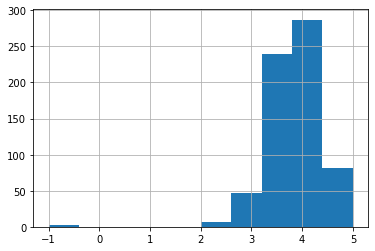

In [58]:
df.Rating.hist()

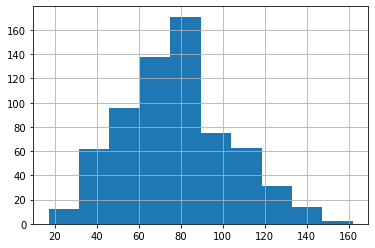

In [60]:
df.min_salary.hist()

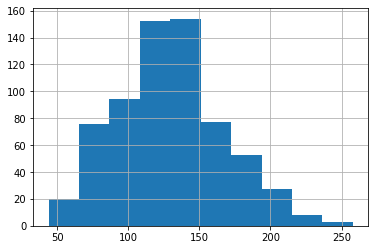

In [61]:
df.max_salary.hist()

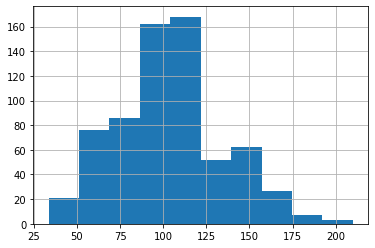

In [62]:
df.avg_salary.hist()

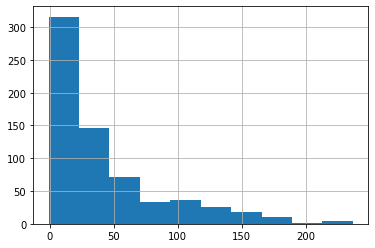

In [63]:
df.age_of_company.hist()

We will have to normalize the age_of_company since its not a normal distribution

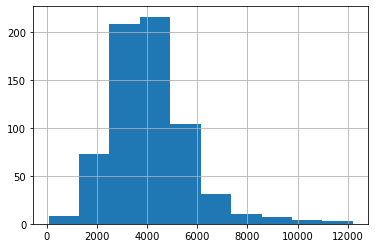

In [64]:
df.desc_length.hist()

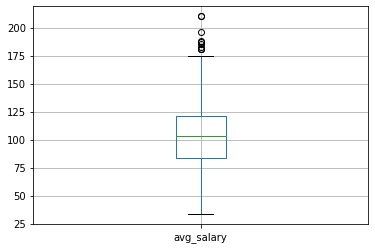

In [65]:
df[['avg_salary']].boxplot()

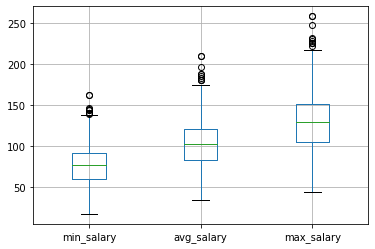

In [67]:
df.boxplot(column=['min_salary','avg_salary','max_salary'])

In [70]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'state', 'age_of_company', 'python_skill', 'sql_skill',
       'r_studio_skill', 'spark_skill', 'excel_skill', 'aws_skill',
       'azure_skill', 'gcp_skill', 'smpl_job_title', 'level', 'desc_length'],
      dtype='object')

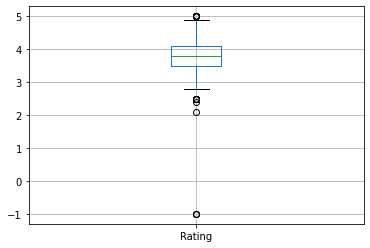

In [72]:
df.boxplot(column=['Rating'])

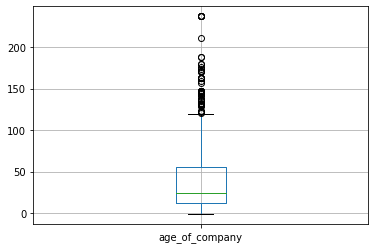

In [74]:
df[['age_of_company']].boxplot()

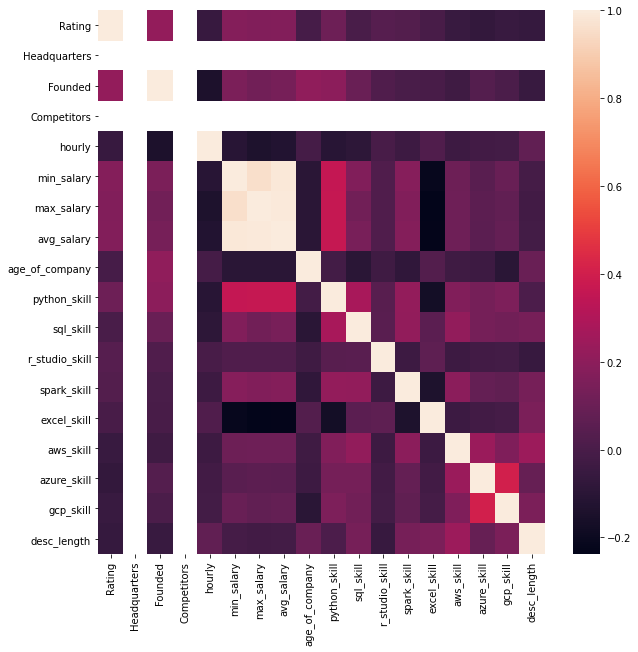

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [110]:
df_cat = df.select_dtypes(include=('object'))

In [111]:
df_cat.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'company_txt', 'state', 'smpl_job_title', 'level'],
      dtype='object')

In [112]:
df_cat.drop(['Job Title','Job Description','Company Name','company_txt'], axis=1, inplace=True)

In [96]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'state', 'age_of_company', 'python_skill', 'sql_skill',
       'r_studio_skill', 'spark_skill', 'excel_skill', 'aws_skill',
       'azure_skill', 'gcp_skill', 'smpl_job_title', 'level', 'desc_length'],
      dtype='object')

In [97]:
df_bin_cat = df[['python_skill', 'sql_skill',
       'r_studio_skill', 'spark_skill', 'excel_skill', 'aws_skill',
       'azure_skill', 'gcp_skill']]

In [113]:
df_cat.shape

(664, 10)

In [99]:
df_bin_cat.shape

(664, 8)

In [157]:
def categorical_barplot(dtfr):
    for col in dtfr.columns:
        counts = dtfr[col].value_counts()
        cats = counts.index
    
        if len(counts) > 20:
            plt.figure(figsize=(15,10))
            print(f'Graph for top 20 items from {col}. Total: {len(counts)}')
            graph=sns.barplot(x=cats[:21], y=counts[:21])
        else:
            plt.figure(figsize=(10,7))
            print(f'Graph for {col}. Total: {len(counts)}')
            graph=sns.barplot(x=cats, y=counts)
                
        graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
        plt.show()
    

Graph for top 20 items from Salary Estimate. Total: 373


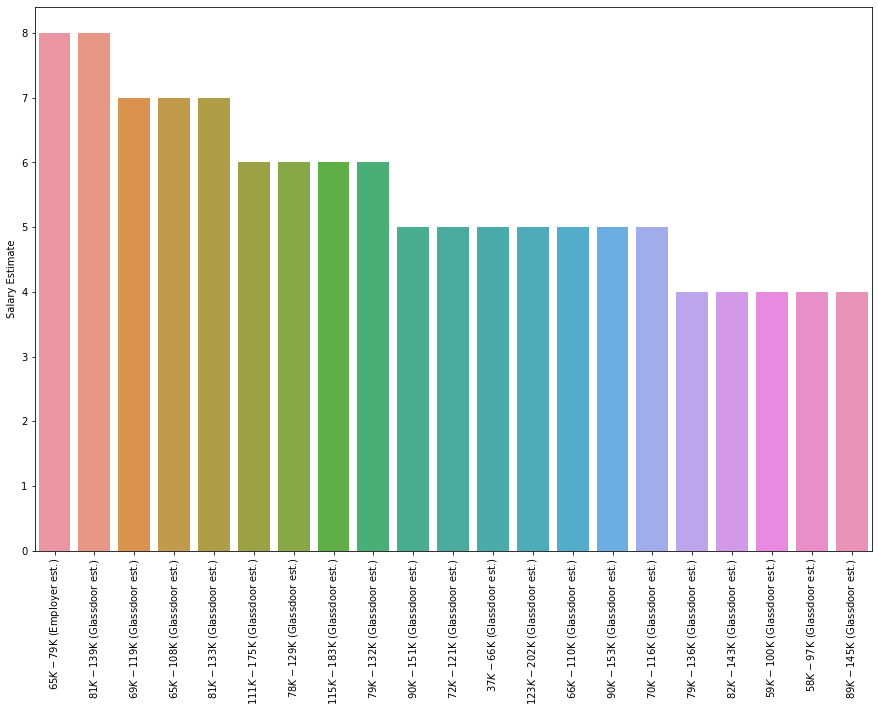

Graph for top 20 items from Location. Total: 185


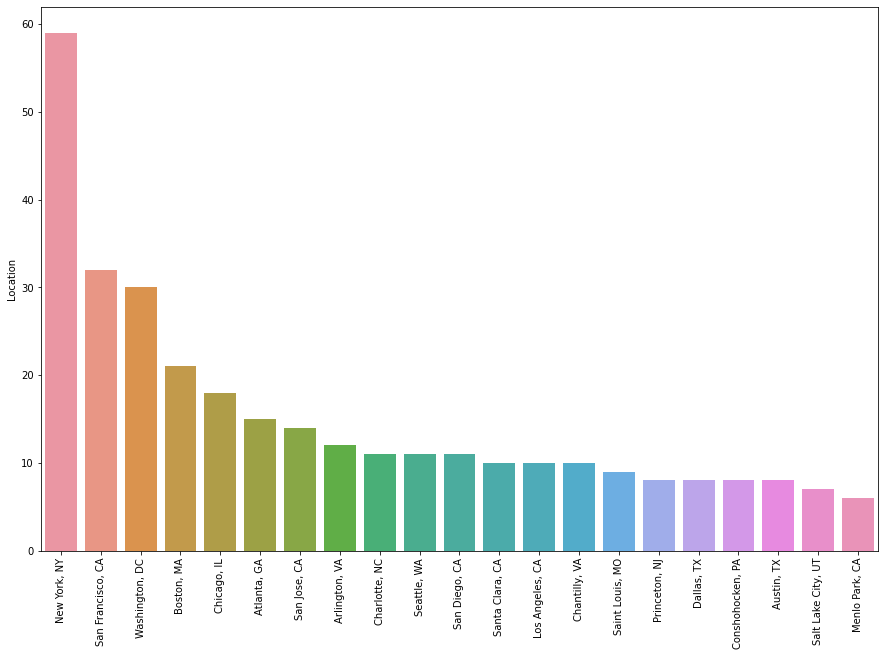

Graph for Size. Total: 9


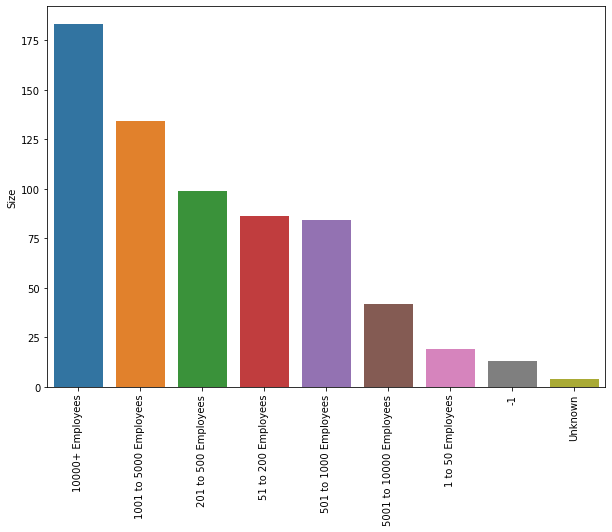

Graph for Type of ownership. Total: 10


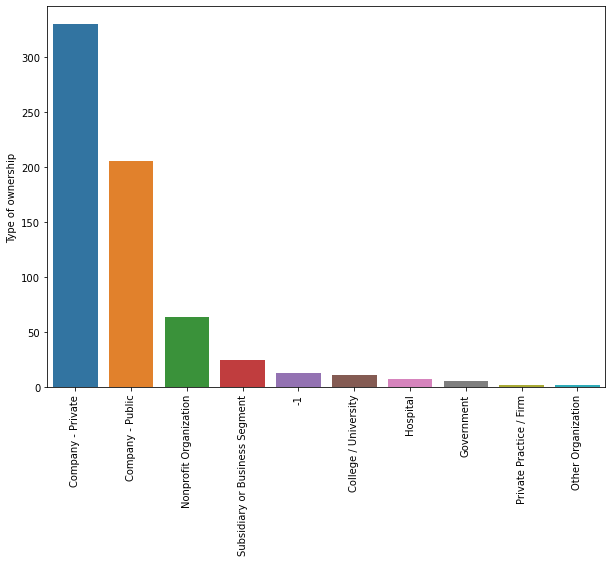

Graph for top 20 items from Industry. Total: 63


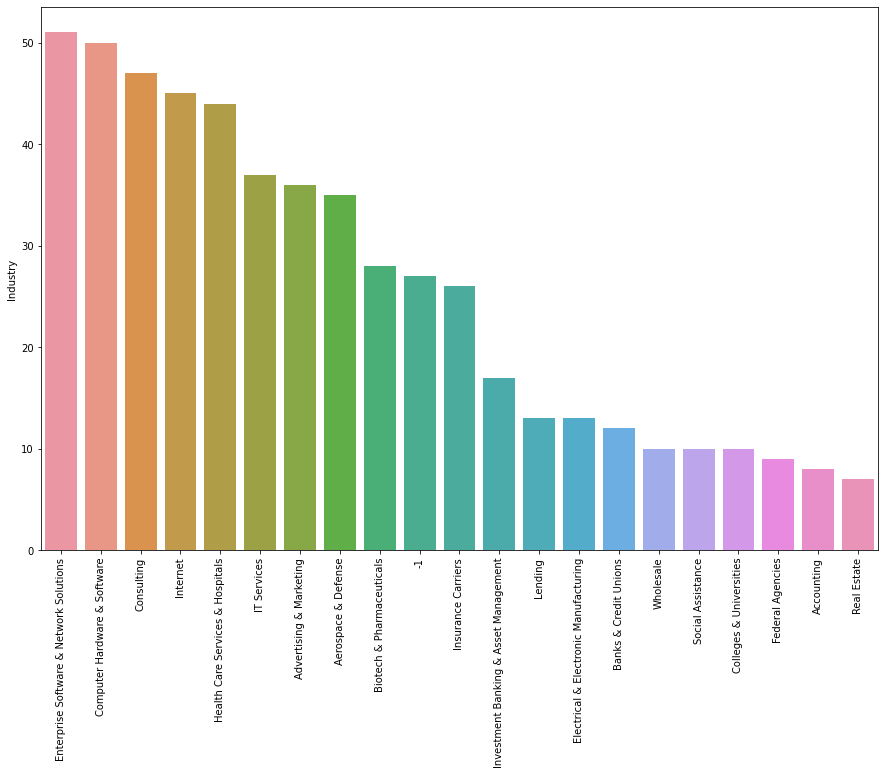

Graph for top 20 items from Sector. Total: 23


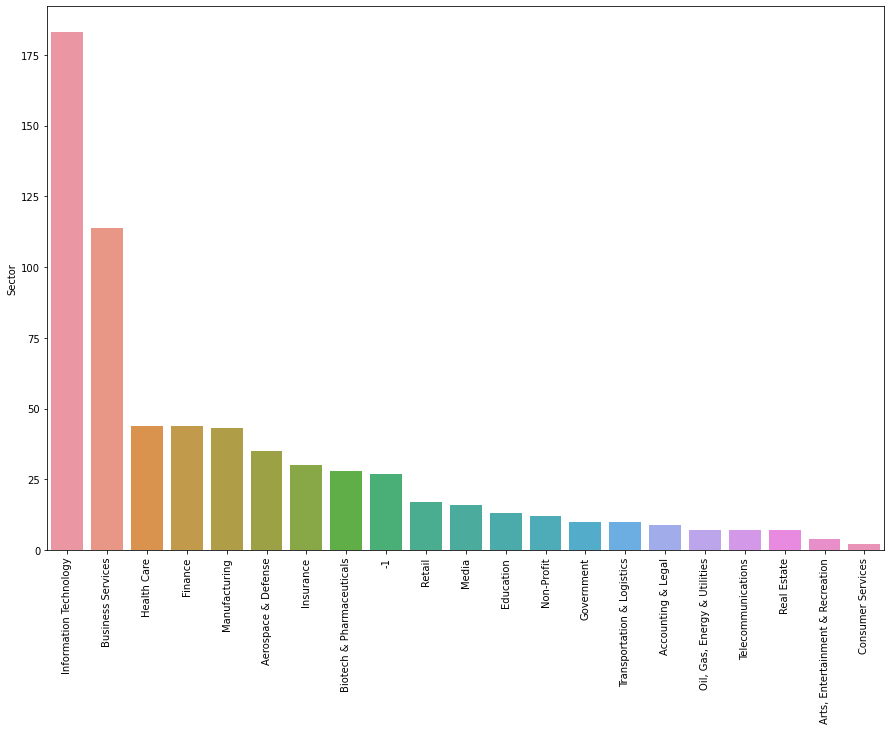

Graph for Revenue. Total: 14


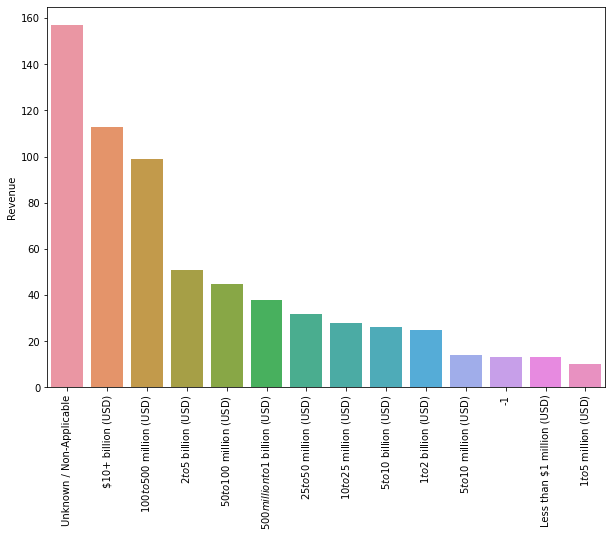

Graph for top 20 items from state. Total: 37


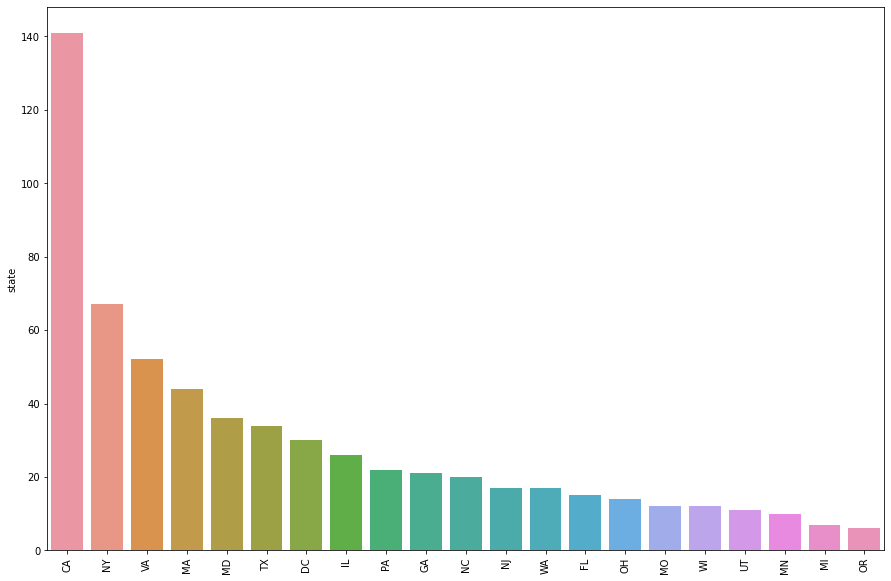

Graph for smpl_job_title. Total: 9


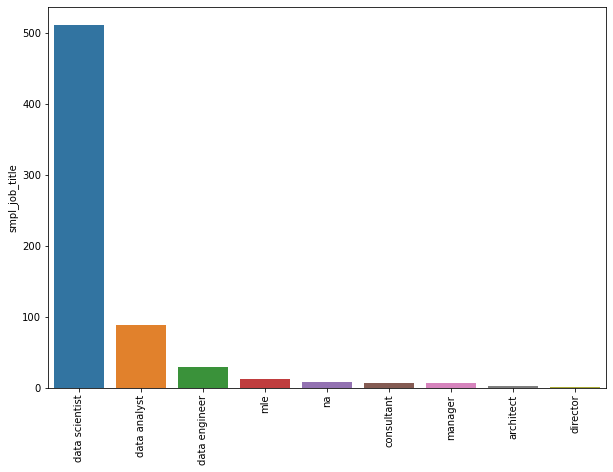

Graph for level. Total: 2


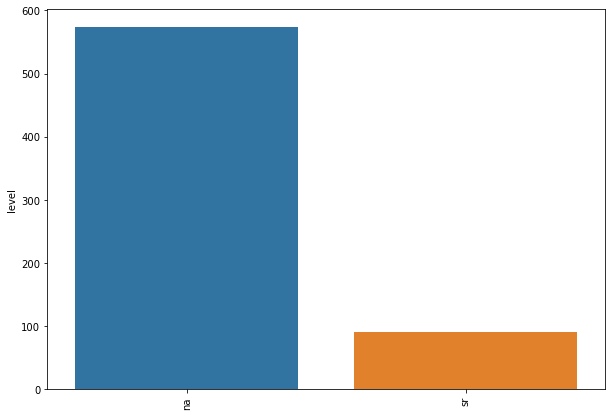

In [158]:
categorical_barplot(df_cat)

Graph for python_skill. Total: 2


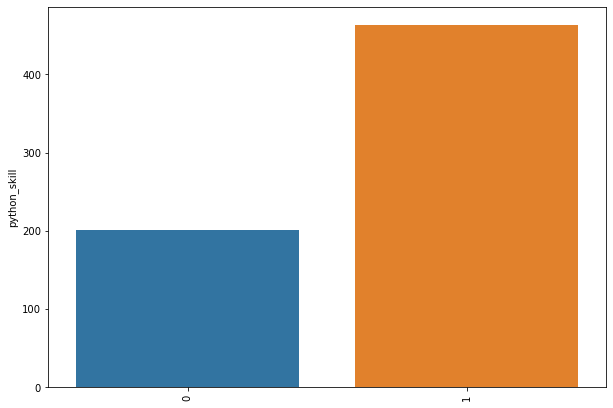

Graph for sql_skill. Total: 2


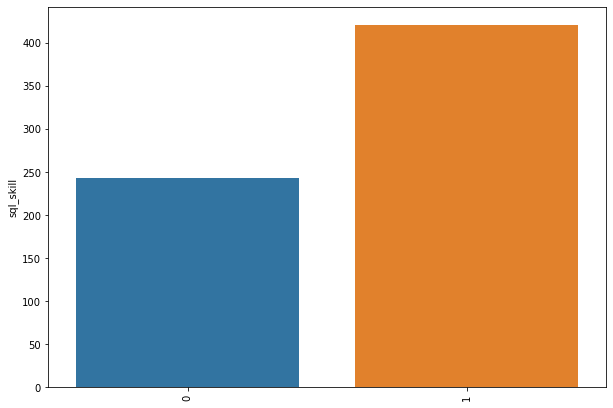

Graph for r_studio_skill. Total: 2


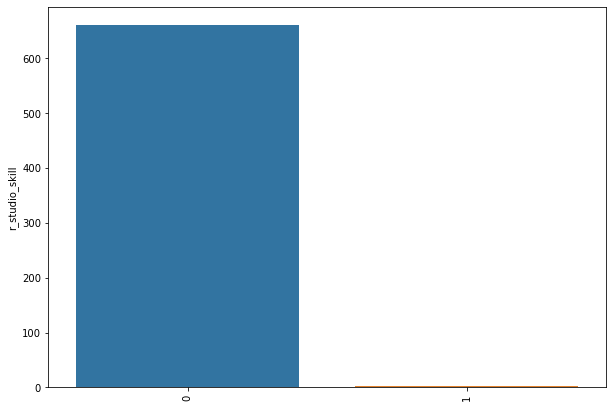

Graph for spark_skill. Total: 2


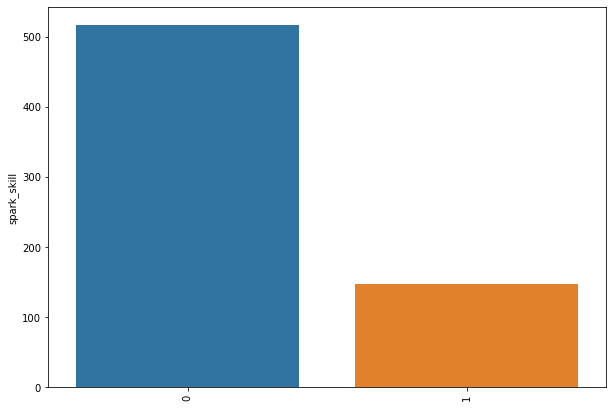

Graph for excel_skill. Total: 2


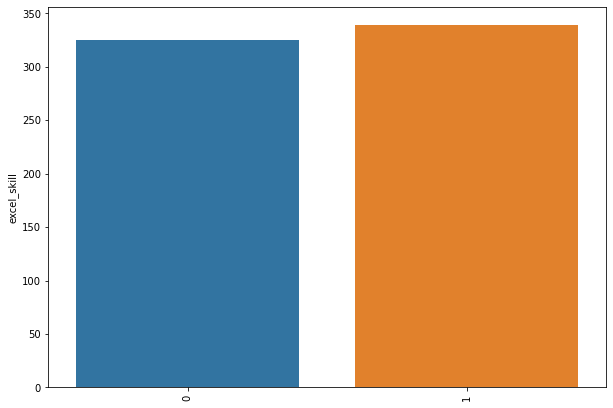

Graph for aws_skill. Total: 2


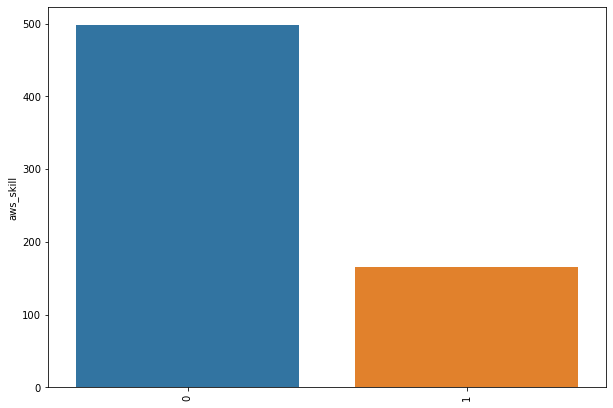

Graph for azure_skill. Total: 2


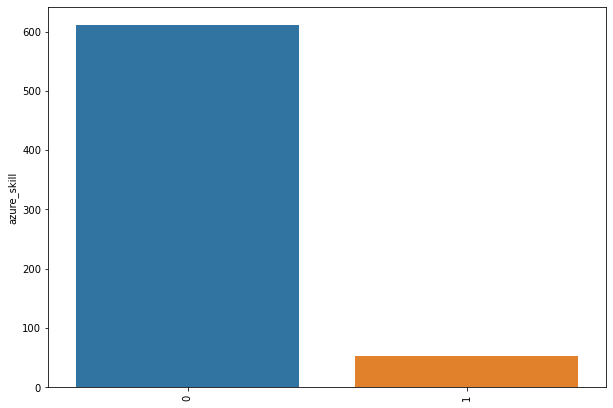

Graph for gcp_skill. Total: 2


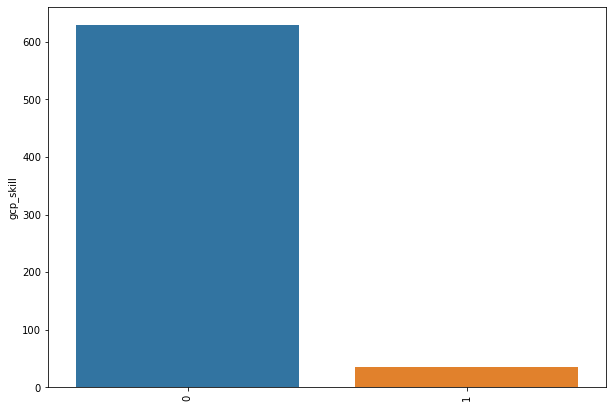

In [159]:
categorical_barplot(df_bin_cat)
    